In [14]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
base_path = os.path.dirname(os.getcwd())  # parent of 'notebooks'
sys.path.insert(1, base_path)

from scripts.helpers import *
from scripts.utils import remove_top_right_frame, jitter_scatterplot

In [16]:
data_df = pd.read_pickle('/Users/raphaelpax/Desktop/neuroscience/BIO482_MiniProject_2025_Python/Data/Data_bio482.pkl')

In [17]:
data_df.head(5)

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,Mouse_Genotype,Mouse_Name,Mouse_Sex,Sweep_ActiveContactTimes,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,"[[6.009, 6.023000000000001], [6.029, 6.091], [...",1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...","[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,"[[6.792999999999999, 6.859000000000002], [6.91...",2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[15.274999999999999, 15.375], [16.247, 16.643...","[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,nan,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[4.347000000000001, 7.0390000000000015], [8.2...","[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,"[[3.831000000000003, 3.8430000000000035], [3.9...",4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,nan,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,C57Bl6j,SC901,m,"[[11.745000000000005, 11.751000000000005], [11...",5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[4.411000000000001, 4.4809999999999945], [5.2...","[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."


In [ ]:
###Compute sweep-level Vm metrics###

def safe_array_mean(x):
    """Return mean of a list/array, or NaN if not valid."""
    if isinstance(x, (list, np.ndarray)):
        arr = np.array(x, dtype=float)
        if arr.size > 0:
            return np.nanmean(arr)
    return np.nan

def safe_array_std(x):
    """Return std of a list/array, or NaN."""
    if isinstance(x, (list, np.ndarray)):
        arr = np.array(x, dtype=float)
        if arr.size > 0:
            return np.nanstd(arr)
    return np.nan

# Mean and std Vm per sweep (over the whole sweep)
data_df["Sweep_MeanVm"] = data_df["Sweep_MembranePotential"].apply(safe_array_mean)
data_df["Sweep_StdVm"]  = data_df["Sweep_MembranePotential"].apply(safe_array_std)

# (Optionnel) vérifier rapidement
display(data_df[["Cell_ID", "Cell_Layer", "Sweep_Counter", "Sweep_MeanVm", "Sweep_StdVm"]].head())

,Cell_ID,Cell_Layer,Sweep_Counter,Sweep_MeanVm,Sweep_StdVm
0,SC901_1,L2/3,1.0,-0.043361,0.004409
1,SC901_1,L2/3,2.0,-0.043586,0.004749
2,SC901_1,L2/3,3.0,-0.041869,0.004709
3,SC901_1,L2/3,4.0,-0.038715,0.005228
4,SC901_1,L2/3,5.0,-0.042626,0.006322


In [20]:
# === 2. Build a per-cell summary dataframe ========================

# On prend une ligne "représentative" pour récupérer layer / depth / type
meta_cols = ["Cell_ID", "Cell_Layer", "Cell_Depth", "Cell_Type",
             "Cell_TargetedBrainArea", "Cell_APThreshold_Slope"]

cell_meta = (
    data_df
    .drop_duplicates(subset=["Cell_ID"])[meta_cols]
    .set_index("Cell_ID")
)

# Moyennes sur les sweeps
cell_vm_stats = (
    data_df
    .groupby("Cell_ID")
    .agg(
        mean_vm_over_sweeps=("Sweep_MeanVm", "mean"),
        std_vm_over_sweeps=("Sweep_MeanVm", "std"),
        mean_sweep_std_vm=("Sweep_StdVm", "mean"),
        n_sweeps=("Sweep_MeanVm", "count")
    )
)

# Fusion meta + stats
cell_df = cell_meta.join(cell_vm_stats, how="inner").reset_index()

# Petit check
display(cell_df.head())

,Cell_ID,Cell_Layer,Cell_Depth,Cell_Type,Cell_TargetedBrainArea,Cell_APThreshold_Slope,mean_vm_over_sweeps,std_vm_over_sweeps,mean_sweep_std_vm,n_sweeps
0,SC901_1,L2/3,229.0,EXC,C2,10.0,-0.041393,0.002117,0.005230,7
1,SC902_1,L2/3,350.0,EXC,C2,10.0,-0.049172,0.001700,0.004874,3
2,SC903_1,L5,550.0,EXC,C2,10.0,-0.053131,NaN,0.003244,1
3,SC904_1,L2/3,244.0,EXC,C2,10.0,-0.046746,0.001094,0.003491,6
4,SC905_1,L2/3,250.0,EXC,C2,10.0,-0.063707,0.004421,0.009165,6


In [21]:
# === 3.1. Descriptif par couche ================================

layer_summary = (
    cell_df
    .groupby("Cell_Layer")
    .agg(
        n_cells=("Cell_ID", "count"),
        mean_vm=("mean_vm_over_sweeps", "mean"),
        std_vm=("mean_vm_over_sweeps", "std"),
        mean_depth=("Cell_Depth", "mean"),
        std_depth=("Cell_Depth", "std")
    )
    .sort_values("mean_depth")
)

display(layer_summary)



,n_cells,mean_vm,std_vm,mean_depth,std_depth
Cell_Layer,,,,,
L2/3,141,-0.053791,0.006092,228.834532,88.188664
L4,79,-0.054888,0.005422,458.139241,42.793701
L5,20,-0.051617,0.005262,581.050000,44.298598


/var/folders/62/hhx0hr3x0593xyr49y92dcsh0000gn/T/ipykernel_90151/2139254027.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


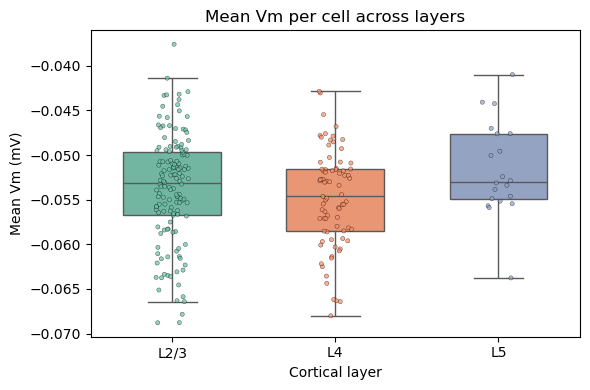

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Build a palette that maps each layer to a distinct color
layers = sorted(cell_df["Cell_Layer"].unique())
palette = dict(zip(layers, sns.color_palette("Set2", n_colors=len(layers))))

sns.boxplot(
    data=cell_df,
    x="Cell_Layer",
    y="mean_vm_over_sweeps",
    order=layers,
    palette=palette,
    width=0.6,
    showfliers=False,  # optional: hides outliers, cleaner when adding points
)

sns.stripplot(
    data=cell_df,
    x="Cell_Layer",
    y="mean_vm_over_sweeps",
    order=layers,
    hue="Cell_Layer",
    palette=palette,
    dodge=False,
    size=3,
    alpha=0.7,
    edgecolor="black",
    linewidth=0.3,
    legend=False,  # avoid duplicate legend
)

plt.ylabel("Mean Vm (mV)")
plt.xlabel("Cortical layer")
plt.title("Mean Vm per cell across layers")
plt.tight_layout()
plt.show()

Correlation depth–Vm: r = -0.037, p = 5.663e-01


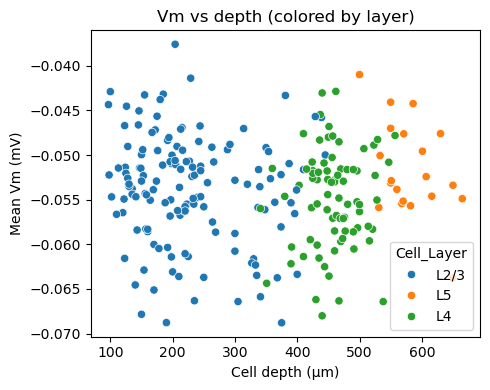

In [23]:
# === 4.1. Corrélation Vm vs profondeur (toutes couches) ==========

valid = cell_df.dropna(subset=["Cell_Depth", "mean_vm_over_sweeps"])
r, p = scipy.stats.pearsonr(valid["Cell_Depth"], valid["mean_vm_over_sweeps"])
print(f"Correlation depth–Vm: r = {r:.3f}, p = {p:.3e}")

plt.figure(figsize=(5, 4))
sns.scatterplot(
    data=valid,
    x="Cell_Depth",
    y="mean_vm_over_sweeps",
    hue="Cell_Layer"
)
plt.xlabel("Cell depth (µm)")
plt.ylabel("Mean Vm (mV)")
plt.title("Vm vs depth (colored by layer)")
plt.tight_layout()
plt.show()

In [24]:
# === 4.2. Régression Vm ~ profondeur dans chaque couche ==========

layers = sorted(cell_df["Cell_Layer"].dropna().unique())

layer_reg_results = []

for layer in layers:
    sub = cell_df.dropna(subset=["Cell_Depth", "mean_vm_over_sweeps"])
    sub = sub[sub["Cell_Layer"] == layer]
    if len(sub) < 3:
        continue  # pas assez de points pour une régression
    
    X = sub[["Cell_Depth"]].values
    y = sub["mean_vm_over_sweeps"].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # r²
    r2 = model.score(X, y)
    
    layer_reg_results.append(
        {"Cell_Layer": layer,
         "n_cells": len(sub),
         "slope": slope,
         "intercept": intercept,
         "r2": r2}
    )
    
layer_reg_df = pd.DataFrame(layer_reg_results)
display(layer_reg_df)

,Cell_Layer,n_cells,slope,intercept,r2
0,L2/3,139,-0.000008,-0.052099,0.012246
1,L4,79,0.000011,-0.059968,0.007660
2,L5,20,-0.000054,-0.020310,0.205725


In [25]:
# === 5. Vm mean par couche et type de cellule ====================

pivot_vm_layer_type = pd.pivot_table(
    cell_df,
    index="Cell_Layer",
    columns="Cell_Type",
    values="mean_vm_over_sweeps",
    aggfunc="mean"
)

display(pivot_vm_layer_type)

Cell_Type,EXC,PV,SST,VIP
Cell_Layer,,,,
L2/3,-0.059196,-0.051746,-0.051597,-0.050260
L4,-0.058229,-0.052404,-0.052109,NaN
L5,-0.053133,-0.040991,-0.051449,-0.048196


NameError: name 'cell_df' is not defined